In [3]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import pandas as pd
#from pynance import Ticker
import yfinance as yf
from yahooquery import Ticker
#import ticker as ticker_symbol
from textblob import TextBlob
import nltk


In [1]:
print("partial of task 2 and task 3")

partial of task 2 and task 3


In [4]:
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')  # Replace with your actual CSV file path

# Display the first few rows of the DataFrame
print("Initial Data:")
print(stock_df.head())

Initial Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
print("\nMissing Values:")
print(stock_df.isnull().sum())


Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [6]:
# Convert the 'date' column to datetime format if it exists
if 'Date' in stock_df.columns:
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df.set_index('Date', inplace=True)  # Set date as index

# Ensure the DataFrame has the required columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for column in required_columns:
    if column not in stock_df.columns:
        raise ValueError(f"Missing required column: {column}")

# Display basic statistics of the DataFrame
print("\nBasic Statistics:")
print(stock_df.describe())

# Display the DataFrame structure
print("\nDataFrame Structure:")
print(stock_df.info())


Basic Statistics:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+08

In [7]:
# Calculate Moving Averages (e.g., 20-day and 50-day)
stock_df['SMA_20'] = talib.SMA(stock_df['Close'], timeperiod=20)
stock_df['SMA_50'] = talib.SMA(stock_df['Close'], timeperiod=50)

In [8]:
# Calculate Relative Strength Index (RSI)
stock_df['RSI'] = talib.RSI(stock_df['Close'], timeperiod=14)

# Calculate MACD
stock_df['MACD'], stock_df['MACD_signal'], stock_df['MACD_hist'] = talib.MACD(stock_df['Close'], 
                                                                               fastperiod=12, 
                                                                               slowperiod=26, 
                                                                               signalperiod=9)

In [9]:
# Display the calculated indicators
print("\nCalculated Technical Indicators:")
print(stock_df[['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


Calculated Technical Indicators:
                 Close      SMA_20      SMA_50        RSI      MACD  \
Date                                                                  
2024-07-24  218.539993  224.228500  208.474199  48.687742  4.662717   
2024-07-25  217.490005  224.440500  209.098399  47.386437  3.748082   
2024-07-26  217.960007  224.633500  209.709000  48.055700  3.026267   
2024-07-29  218.240005  225.014500  210.279400  48.476184  2.448591   
2024-07-30  218.800003  225.117001  210.858600  49.359115  2.012764   

            MACD_signal  MACD_hist  
Date                                
2024-07-24     6.678882  -2.016164  
2024-07-25     6.092722  -2.344640  
2024-07-26     5.479431  -2.453164  
2024-07-29     4.873263  -2.424672  
2024-07-30     4.301163  -2.288399  


In [11]:
# Calculate Relative Strength Index (RSI)
stock_df['RSI'] = talib.RSI(stock_df['Open'], timeperiod=14)

# Calculate MACD
stock_df['MACD'], stock_df['MACD_signal'], stock_df['MACD_hist'] = talib.MACD(stock_df['Close'], 
                                                                               fastperiod=12, 
                                                                               slowperiod=26, 
                                                                               signalperiod=9)

In [12]:
# Display the calculated indicators
print("\nCalculated Technical Indicators:")
print(stock_df[['Open', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


Calculated Technical Indicators:
                  Open      SMA_20      SMA_50        RSI      MACD  \
Date                                                                  
2024-07-24  224.000000  224.228500  208.474199  55.246943  4.662717   
2024-07-25  218.929993  224.440500  209.098399  48.539265  3.748082   
2024-07-26  218.699997  224.633500  209.709000  48.253055  3.026267   
2024-07-29  216.960007  225.014500  210.279400  46.041233  2.448591   
2024-07-30  219.190002  225.117001  210.858600  49.251843  2.012764   

            MACD_signal  MACD_hist  
Date                                
2024-07-24     6.678882  -2.016164  
2024-07-25     6.092722  -2.344640  
2024-07-26     5.479431  -2.453164  
2024-07-29     4.873263  -2.424672  
2024-07-30     4.301163  -2.288399  


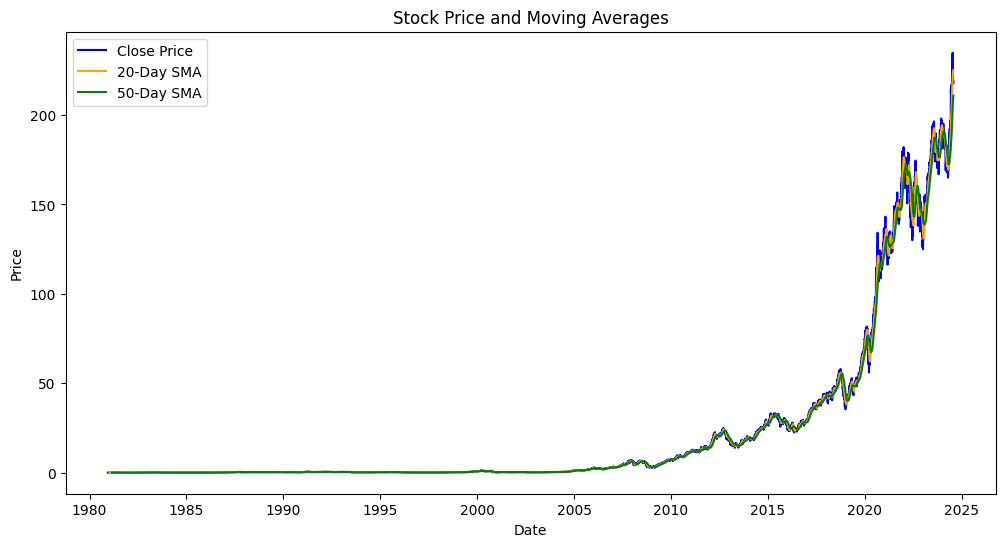

In [14]:

# Plot Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(stock_df['SMA_50'], label='50-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


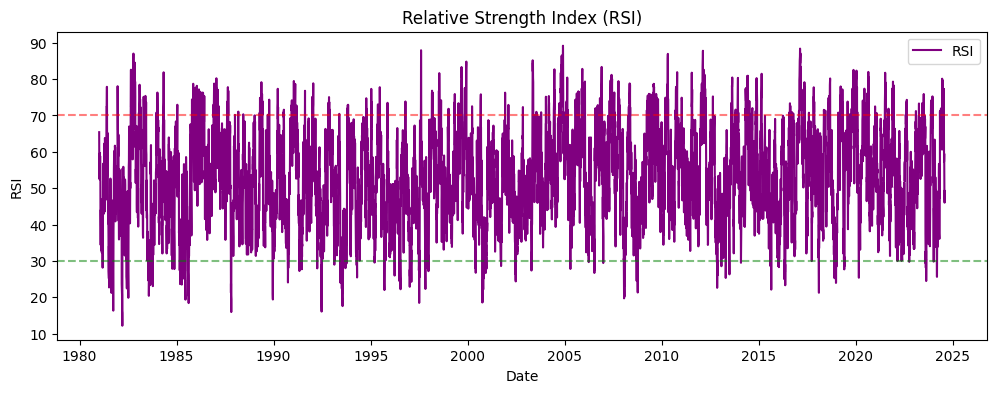

In [15]:
# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(stock_df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought line
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


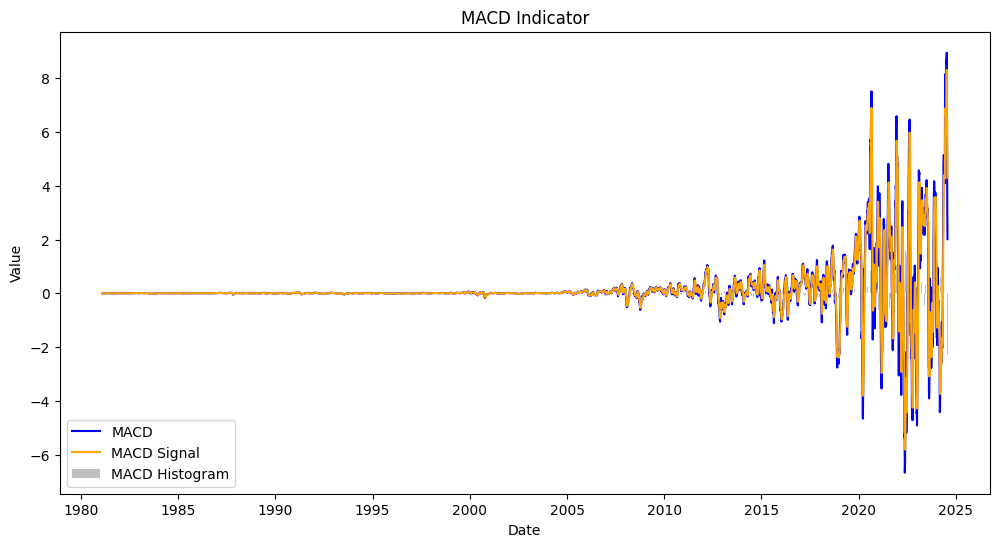

In [16]:
# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(stock_df['MACD'], label='MACD', color='blue')
plt.plot(stock_df['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(stock_df.index, stock_df['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [88]:
# Load stock data using PyNance
ticker_symbol = 'AAPL' 
ticker = Ticker(ticker_symbol)

# Get historical data
stock_data = ticker.history(period='1y')  # Last year of data
stock_data.reset_index(inplace=True)

# Display the first few rows
print("Stock Data:")
print(stock_data.head())

c:\Users\Tesfaye\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahooquery\utils\__init__.py:1470: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  has_live_indice = index_utc[-1] >= last_trade - pd.Timedelta(2, "S")


Stock Data:
  symbol        date        open        high         low       close  \
0   AAPL  2023-08-31  187.839996  189.119995  187.479996  187.869995   
1   AAPL  2023-09-01  189.490005  189.919998  188.279999  189.460007   
2   AAPL  2023-09-05  188.279999  189.979996  187.610001  189.699997   
3   AAPL  2023-09-06  188.399994  188.850006  181.470001  182.910004   
4   AAPL  2023-09-07  175.179993  178.210007  173.539993  177.559998   

      volume    adjclose  dividends  
0   60794500  186.913528        0.0  
1   45732600  188.495453        0.0  
2   45280000  188.734222        0.0  
3   81755800  181.978806        0.0  
4  112488800  176.656021        0.0  


c:\Users\Tesfaye\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahooquery\ticker.py:1333: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dividends"].fillna(0, inplace=True)


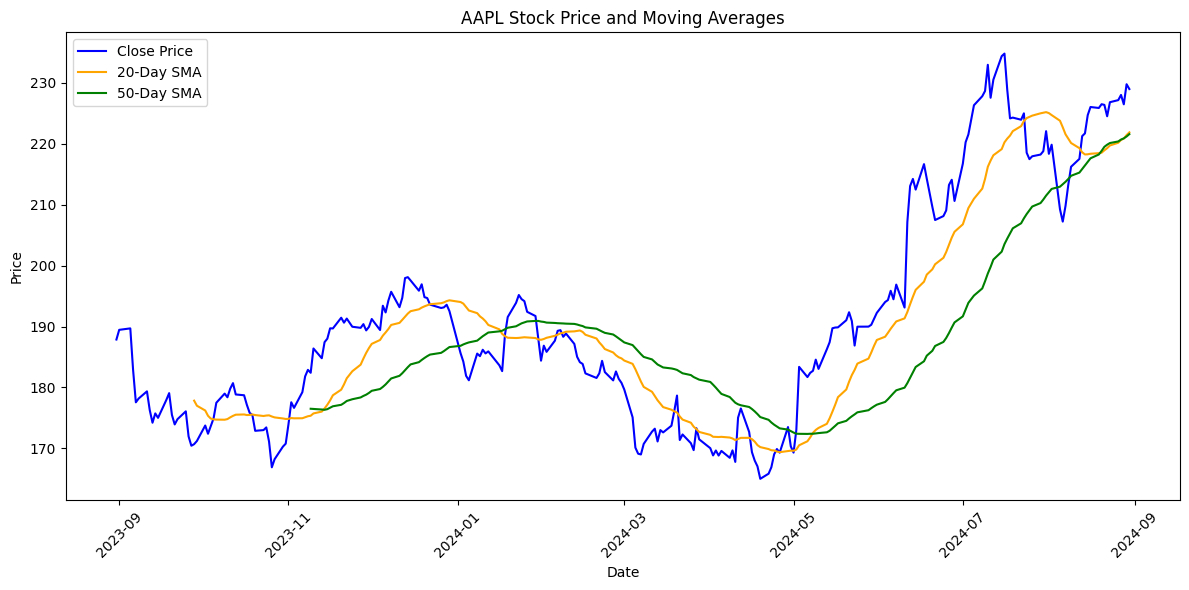

In [94]:
# Calculate financial metrics (e.g., moving averages)
stock_data['SMA_20'] = stock_data['close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['close'].rolling(window=50).mean()

# Visualize the stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label='Close Price', color='blue')
plt.plot(stock_data['date'], stock_data['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['date'], stock_data['SMA_50'], label='50-Day SMA', color='green')
plt.title(f'{ticker_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

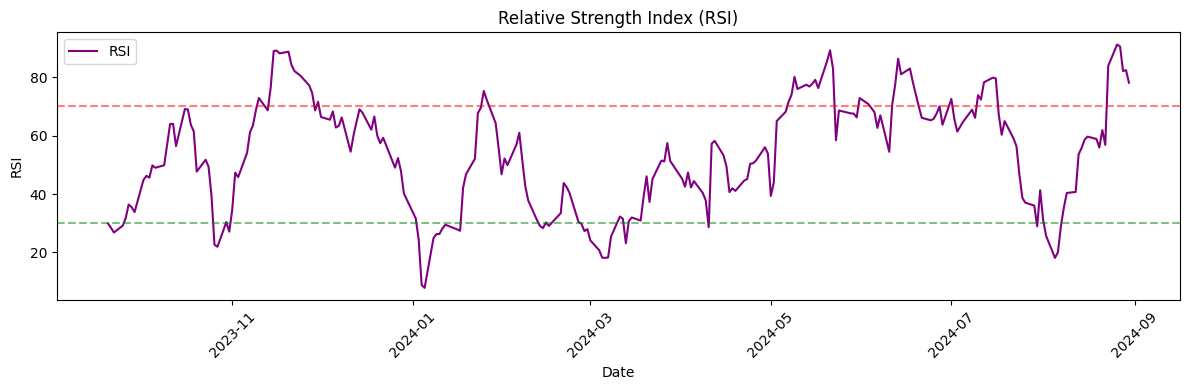

In [95]:
# Calculate and visualize additional financial metrics (e.g., RSI)
delta = stock_data['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(stock_data['date'], stock_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought line
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

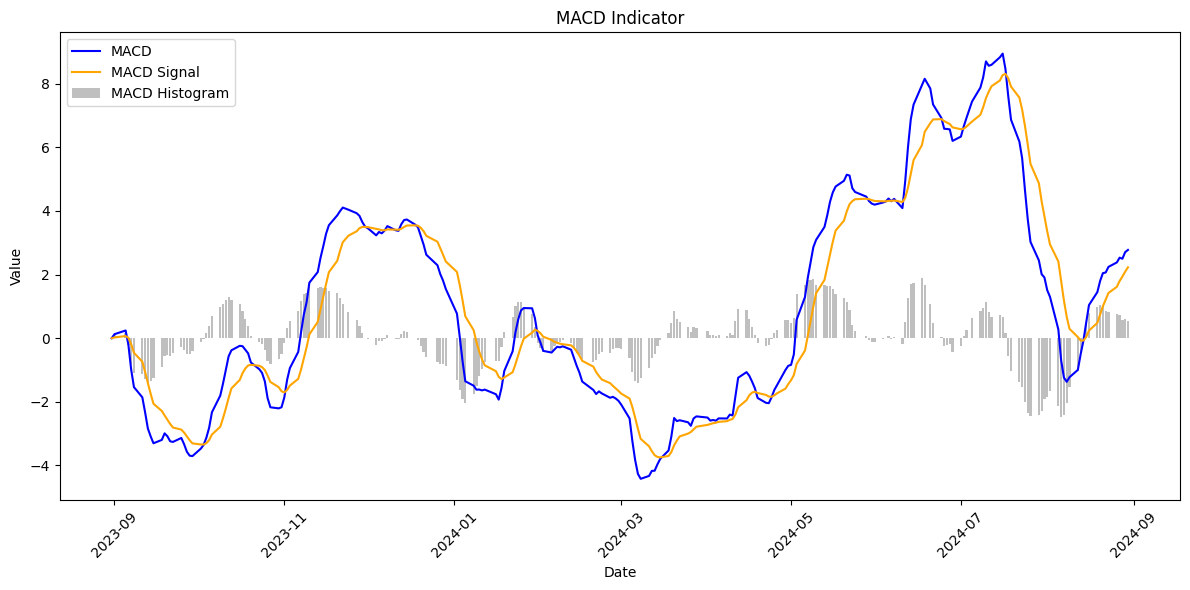

In [97]:
# Visualize MACD
ema12 = stock_data['close'].ewm(span=12, adjust=False).mean()
ema26 = stock_data['close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = ema12 - ema26
stock_data['MACD_signal'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['date'], stock_data['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(stock_data['date'], stock_data['MACD'] - stock_data['MACD_signal'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#task3

In [27]:
# Load the datasets
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv') 

In [29]:
news_df['date'] = news_df['date'].str.strip()
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date  # Use only the date
news_df['headline'] = news_df['headline'].astype(str)  # Ensure headlines are strings



# Check for any NaT values resulting from conversion
if news_df['date'].isnull().any():
    print("Some dates could not be parsed. Check for NaT values:")
    print(news_df[news_df['date'].isnull()])

Some dates could not be parsed. Check for NaT values:
        Unnamed: 0                                           headline  \
10              10    30 Stocks Moving in Friday's Pre-Market Session   
11              11  SVB Leerink Maintains Outperform on Agilent Te...   
12              12  8 Stocks Moving In Thursday's After-Hours Session   
13              13  Agilent Technologies shares are trading higher...   
14              14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...            ...                                                ...   
943679      948487  Omega Flex Reports Q4 EPS $0.44 vs $0.41 In Sa...   
943680      948488  Omega Flex Reports Q3 EPS $1.11 vs $1.02 In Sa...   
943681      948489  Mid-Afternoon Market Update: Cintas Rises On E...   
943682      948490               15 Biggest Mid-Day Losers For Friday   
943683      948491  Mid-Day Market Update: Crude Oil Down 1.6%; Pl...   

                                                      url  \
10      

In [30]:
# Normalize dates in the stock dataset
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date  # Use only the date
stock_df.set_index('Date', inplace=True)  # Set date as index for easier merging

# Display the first few rows of both DataFrames
print("News Data:")
print(news_df.head())
print("\nStock Data:")
print(stock_df.head())

News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A

In [31]:
# Filter news to include only dates that are in the stock dataset
filtered_news_df = news_df[news_df['date'].isin(stock_df.index)]
# Merge the datasets on the date
merged_df = pd.merge(filtered_news_df, stock_df, left_on='date', right_index=True, how='inner')

In [32]:

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head())

# Optional: Check for missing values
print("\nMissing Values in Merged DataFrame:")
print(merged_df.isnull().sum())


Merged DataFrame:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock       Open       High        Low      Close  Adj Close  \
0  2020-06-05     A  80.837502  82.937500  

In [33]:
from textblob import TextBlob

In [35]:
news_df = pd.read_csv('../data/raw_analyst_ratings.csv') 
# Display the first few rows of the DataFrame
print("News Data:")
print(news_df.head())

News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:3

In [36]:

# Function to determine sentiment
def analyze_sentiment(headline):
    """
    Analyze the sentiment of a news headline.
    
    Parameters:
    headline (str): The news headline to analyze.
    
    Returns:
    str: 'positive', 'negative', or 'neutral' based on the sentiment score.
    """
    analysis = TextBlob(headline)
    # Classify sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [37]:
# Apply sentiment analysis to the headlines
news_df['sentiment'] = news_df['headline'].apply(analyze_sentiment)

In [38]:
# Display the results
print("\nSentiment Analysis Results:")
print(news_df[['headline', 'sentiment']].head())

# Optional: Count the sentiment distribution
sentiment_counts = news_df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


Sentiment Analysis Results:
                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   neutral
1         Stocks That Hit 52-Week Highs On Wednesday   neutral
2                      71 Biggest Movers From Friday   neutral
3       46 Stocks Moving In Friday's Mid-Day Session   neutral
4  B of A Securities Maintains Neutral on Agilent...   neutral

Sentiment Distribution:
sentiment
neutral     622696
positive    234469
negative     86519
Name: count, dtype: int64


In [39]:
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv') 

In [40]:
# Ensure the 'date' column is in datetime format and set it as the index
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
print("Stock Data:")
print(stock_df.head())

Stock Data:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [41]:
# Calculate daily stock returns as percentage change in closing prices
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100  # Multiply by 100 to convert to percentage

# Display the results
print("\nDaily Stock Returns:")
print(stock_df[['Close', 'daily_return']].dropna().head())  # Drop NaN values for better display


Daily Stock Returns:
               Close  daily_return
Date                              
1980-12-15  0.121652     -5.217061
1980-12-16  0.112723     -7.339788
1980-12-17  0.115513      2.475091
1980-12-18  0.118862      2.899246
1980-12-19  0.126116      6.102867


In [42]:
from scipy.stats import pearsonr

In [44]:
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')

In [58]:
# Normalize dates in the news dataset

news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date
news_df['headline'] = news_df['headline'].astype(str)  # Ensure headlines are strings

# Check for any NaT values resulting from conversion
if news_df['date'].isnull().any():
    print("Some dates could not be parsed. Check for NaT values:")
    print(news_df[news_df['date'].isnull()])


Some dates could not be parsed. Check for NaT values:
        Unnamed: 0                                           headline  \
10              10    30 Stocks Moving in Friday's Pre-Market Session   
11              11  SVB Leerink Maintains Outperform on Agilent Te...   
12              12  8 Stocks Moving In Thursday's After-Hours Session   
13              13  Agilent Technologies shares are trading higher...   
14              14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...            ...                                                ...   
943679      948487  Omega Flex Reports Q4 EPS $0.44 vs $0.41 In Sa...   
943680      948488  Omega Flex Reports Q3 EPS $1.11 vs $1.02 In Sa...   
943681      948489  Mid-Afternoon Market Update: Cintas Rises On E...   
943682      948490               15 Biggest Mid-Day Losers For Friday   
943683      948491  Mid-Day Market Update: Crude Oil Down 1.6%; Pl...   

                                                      url  \
10      

In [60]:
# Normalize dates in the stock dataset

stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.set_index('Date', inplace=True)

In [66]:

# Function to determine sentiment
def analyze_sentiment(headline):
    """
    Analyze the sentiment of a news headline.
    
    Parameters:
    headline (str): The news headline to analyze.
    
    Returns:
    str: 'positive', 'negative', or 'neutral' based on the sentiment score.
    """
    analysis = TextBlob(headline)
    # Classify sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [67]:
# Filter news to include only dates that are in the stock dataset
filtered_news_df = news_df[news_df['date'].isin(stock_df.index)]

# Calculate daily stock returns
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100  # Percentage change

# Merge the datasets on the date
news_df['sentiment'] = news_df['headline'].apply(analyze_sentiment)
merged_df = pd.merge(filtered_news_df, stock_df[['daily_return']], left_on='date', right_index=True, how='inner')

# Display the merged DataFrame to check the alignment
print("\nMerged DataFrame:")
print(merged_df[['date', 'sentiment', 'daily_return']])


Merged DataFrame:
              date sentiment  daily_return
0       2020-06-05   neutral      2.848099
1       2020-06-03   neutral      0.550504
2       2020-05-26   neutral     -0.677351
3       2020-05-22   neutral      0.643840
4       2020-05-22   neutral      0.643840
...            ...       ...           ...
943661  2019-12-17   neutral      0.196533
943662  2019-12-16  positive      1.711790
943663  2019-10-17   neutral      0.388277
943664  2019-10-17  negative      0.388277
943665  2019-07-18  negative      1.135971

[36433 rows x 3 columns]


In [68]:
# Encode sentiment scores for correlation
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
merged_df['sentiment_score'] = merged_df['sentiment'].map(sentiment_mapping)

# Calculate correlation between sentiment scores and daily stock returns
correlation, p_value = pearsonr(merged_df['sentiment_score'], merged_df['daily_return'])

# Display the correlation results
print(f"\nCorrelation between news sentiment scores and daily stock returns: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between news sentiment scores and daily stock returns: 0.0270
P-value: 0.0000
The correlation is statistically significant.


In [69]:
filtered_news_df = news_df[news_df['date'].isin(stock_df.index)]

In [71]:
# Encode sentiment scores
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
filtered_news_df['sentiment_score'] = filtered_news_df['sentiment'].map(sentiment_mapping)

# Aggregate daily sentiment scores
average_sentiment = filtered_news_df.groupby('date')['sentiment_score'].mean().reset_index()
average_sentiment.rename(columns={'sentiment_score': 'average_sentiment'}, inplace=True)

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_20428\2938473994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_news_df['sentiment_score'] = filtered_news_df['sentiment'].map(sentiment_mapping)


In [72]:
# Calculate daily stock returns
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100  # Percentage change

# Merge the average sentiment with daily stock returns
merged_df = pd.merge(average_sentiment, stock_df[['daily_return']], left_on='date', right_index=True, how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame with Average Sentiment and Daily Returns:")
print(merged_df)


Merged DataFrame with Average Sentiment and Daily Returns:
            date  average_sentiment  daily_return
0     2011-04-27           0.000000     -0.077056
1     2011-04-28           0.500000     -0.971004
2     2011-04-29           0.000000      0.974765
3     2011-05-02           0.000000     -1.099598
4     2011-05-03           0.000000      0.554462
...          ...                ...           ...
2137  2020-06-05           0.609400      2.848099
2138  2020-06-08           0.388119      0.591249
2139  2020-06-09          -0.234522      3.157800
2140  2020-06-10          -0.076923      2.572751
2141  2020-06-11          -0.120690     -4.801044

[2142 rows x 3 columns]


In [73]:

# Calculate Pearson correlation between average daily sentiment and daily stock returns
correlation, p_value = pearsonr(merged_df['average_sentiment'], merged_df['daily_return'])

# Display the correlation results
print(f"\nCorrelation between average daily sentiment scores and daily stock returns: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between average daily sentiment scores and daily stock returns: 0.0183
P-value: 0.3965
The correlation is not statistically significant.
